### <center> Отличие AlexNet от LeeNet </center>

### <center>Fig. 1 LeNet (left) and AlexNet (right)</center>

### <center> AlexNet </center>

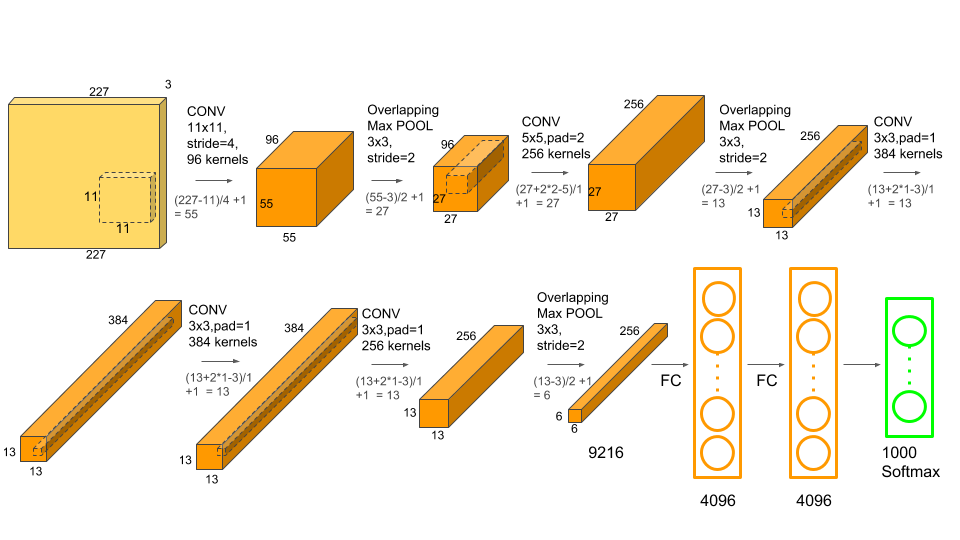

### <center>Fig. 2 AlexNet </center>

## Нейронная сеть Lenet5.

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

from keras.models import Sequential
from keras import models, layers
import keras

# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=x_train,y=y_train, epochs=1, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 5s 475us/step
Test loss 0.3416, accuracy 90.43%


## Нейронная сеть AlexNet.

In [27]:
from keras.datasets import mnist
from keras.utils import np_utils

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# # конвертация чисел из uint8 в float32
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# # нормализация данных [0, 1]
# x_train /= 255 
# x_test /= 255 

# # трансформация лейблов в one-hot encoding
# y_train = np_utils.to_categorical(y_train, 10) 
# y_test = np_utils.to_categorical(y_test, 10) 

# # изменение размерности массива в 4D массив
# x_train = x_train.reshape(x_train.shape[0], 28,28,1)
# x_test = x_test.reshape(x_test.shape[0], 28,28,1)

from keras.models import Sequential
from keras import models, layers
import keras
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,
    target_size=(224, 224))

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=y_train,
    target_size=(224, 224))

test_generator = train_datagen.flow_from_dataframe(
    dataframe=x_test,
    target_size=(224, 224))

test_validation_generator = test_datagen.flow_from_dataframe(
    dataframe=y_test,
    target_size=(224, 224))


# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224,224,3), padding='valid'))

# второй пуллинговый слой
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# пятый сверточный слой
model.add(layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

# шестой сверточный слой
model.add(layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

# седьмой сверточный слой
model.add(layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))

# восьмой полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# девятый полносвязный слой
model.add(layers.Dense(4096, activation='relu'))

# десятый полносвязный слой
model.add(layers.Dense(4096, activation='relu'))

# одиннацатый полносвязный слой
model.add(layers.Dense(1000, activation='relu'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))



# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=train_generator,y=validation_generator, epochs=1, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(test_generator, test_validation_generator)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices